# **1. Binary Search**



In [ ]:
%%writefile binary_search.cpp
#include <iostream>
#include <vector>

using namespace std;
using std::vector;

int BinarySearch(vector<int> Arr, int l, int u, int Target)
{

  while (l <= u)
  {

    int mid = (l + u) / 2;

    if (Arr[mid] == Target)
    {
      return mid;
    }
    else if (Target < Arr[mid])
    {
      u = mid - 1;
    }
    else if (Target > Arr[mid])
    {
      l = mid + 1;
    }
  }
  return -1;
}

void FindinFirst(vector<int> a, int n, vector<int> b, int m)
{
  for (int i = 0; i < m; i++)
  {
    if (b[i] > a[n - 1] || b[i] < a[0])
    {
      cout << -1 << " ";
    }
    else
    {
      cout << BinarySearch(a, 0, n - 1, b[i]) << " ";
    }
  }
}

int main()
{
  int n;
  cin >> n;

  vector<int> First(n);
  for (int i = 0; i < n; i++)
    cin >> First[i];

  int k;
  cin >> k;
  vector<int> Second(k);
  for (int i = 0; i < k; i++)
    cin >> Second[i];

  FindinFirst(First, n, Second, k);
  return 0;
}

Writing binary_search.cpp


In [ ]:
!g++ binary_search.cpp -o binary_search
!./binary_search

# **2. Binary Search with Duplicates**


In [ ]:
seq = [int(i) for i in input().split()]
search_seq = [int(i) for i in input().split()]
n = seq[0]
seq = seq[1:]

def binary_search(seq, elt, r):
    l = 0
    while l<=r: 
        m = (l+r)//2
        if elt > seq[m]:
            l = m + 1
        elif elt < seq[m]:
            r = m - 1
        else:
            return m
    return -1

soln = list()
for i in search_seq[1:]:
    ans = binary_search(seq, i, n-1)
    soln.append(ans)
print(' '.join([str(i) for i in soln]))


# **3. Majority Element**

In [ ]:
# python3
n = int(input())
seq = [int(i) for i in input().split()]


def divide_func(seq, l, r):
    if l+1==r:
        return seq[l]
    elif l+2==r:
        return seq[l]
    m = (l+r)//2
    left = divide_func(seq, l, m)
    right = divide_func(seq, m, r)

    c1, c2 = 0, 0
    for i in seq[l:r]:
        if i == left:
            c1+=1
        elif i == right:
            c2+=1
    if c1>(r-l)//2 and left != -1:
        return left
    elif c2>(r-l)//2 and right != -1:
        return right
    else: 
        return -1

print(int(divide_func(seq, 0, n) != -1))


2
2 3
1


# **4. Improving QuickSort**

In [ ]:
import random
import time
def quicksort3(arr, l, r):
    # print('Splitting:', arr[l:r])
    if l + 1 >= r:
        return

    # Pivot selection; Return a random integer N such that l <= N <= r
    m = random.randint(l, r-1)
    # temp = sorted([(0,arr[0]), ((l+r)//2,arr[(l+r)//2]), (-1,arr[-1])], key = lambda x: x[1])
    # m = temp[1][0]
    arr[l], arr[m] = arr[m], arr[l]

    # partition procedure
    m1, m2 = partition3(arr, l, r)

    quicksort3(arr, l, m1)
    quicksort3(arr, m2+1, r)

def partition3(arr, l, r):
    m2 = l
    for i in range(l+1, r):
        if arr[i] <= arr[l]:
            arr[m2+1], arr[i] = arr[i], arr[m2+1]
            m2 += 1

    arr[l], arr[m2] = arr[m2], arr[l]

    m1 = l
    for i in range(l, m2):
        if arr[i] < arr[m2]:
            arr[i], arr[m1] = arr[m1], arr[i]
            m1 += 1
    return m1, m2

def create_array(size):
    return [random.choice(list(range(10))) for _ in range(size)]

# n = int(input())
# seq = [int(i) for i in input().split()]
# for x in seq:
    # print(x, end=' ')

t1 = time.time()
seq = create_array(100000)
quicksort3(seq, 0, 100000)
t2 = time.time()
print('Time taken:', t2-t1)

    



Time taken: 0.2553279399871826


# **5. Inversions**


In [ ]:
# python3

""" Task: Count the number of inversions of a given sequence """

def merge(left, right):
    i, j, inversion_counter = 0, 0, 0
    final = list()
    while i < len(left) and j< len(right):
        if left[i] <= right[j]:
            final.append(left[i])
            i += 1
        else:
            final.append(right[j])
            inversion_counter += len(left) - i
            j += 1

    final += left[i:]
    final += right[j:]
        
    return final, inversion_counter

def mergesort(arr):
    global tot_count
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2

    left = mergesort(arr[:mid])
    right = mergesort(arr[mid:])

    sorted_arr, temp = merge(left, right)
    tot_count += temp

    return sorted_arr

tot_count = 0
n = int(input())
seq = [int(i) for i in input().split()]
mergesort(seq)
print(tot_count)

# **6.  Organizing a Lottery**



In [ ]:
""" Task: You are given a set of points on a line and a set of segments on a line. The goal is to compute, for each point, the number of segments that contain this point """

# Inputs
master_list = list()
s, p = [int(i) for i in input().split()]

for i in range(s):
    a, b = [int(i) for i in input().split()]
    master_list.append((a,'l'))
    master_list.append((b,'r'))

points = input().split()
for i in points:
    master_list.append((int(i),'p'))

master_list.sort()

segment_count = 0
point_segment_map = dict()
for i in master_list:
    if i[1] == 'l': segment_count += 1
    elif i[1] == 'r': segment_count -= 1
    else:
        point_segment_map[i[0]] = segment_count

temp = ''
for i in points:
    temp += str(point_segment_map[int(i)]) + ' '
print(temp[:-1])

# **7. Closest Points**

In [ ]:
import math
def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def closest_split_pair(p_x, p_y, delta, best_pair):
    ln_x = len(p_x)  # store length - quicker
    mx_x = p_x[ln_x // 2][0]  # select midpoint on x-sorted array

    # Create a subarray of points not further than delta from midpoint on x-sorted array
    s_y = [x for x in p_y if mx_x - delta <= x[0] <= mx_x + delta]

    best = delta  # assign delta value to best
    ln_y = len(s_y)  # store length of subarray for quickness
    for i in range(ln_y - 1):
        for j in range(i+1, min(i + 5, ln_y)):    # We have to check only next 5 points; proof found in literature
            p, q = s_y[i], s_y[j]
            dst = dist(p, q)
            if dst < best:
                best_pair = p, q
                best = dst
    return best_pair[0], best_pair[1], best


def brute(ax):
    mi = dist(ax[0], ax[1])
    p1 = ax[0]
    p2 = ax[1]
    ln_ax = len(ax)
    if ln_ax == 2:
        return p1, p2, mi
    for i in range(ln_ax-1):
        for j in range(i + 1, ln_ax):
            if i != 0 and j != 1:
                d = dist(ax[i], ax[j])
                if d < mi:  # Update min_dist and points
                    mi = d
                    p1, p2 = ax[i], ax[j]
    return p1, p2, mi


def closest_pair(ax, ay):
    ln_ax = len(ax)  # It's quicker to assign variable
    if ln_ax <= 3:
        return brute(ax)  # A call to bruteforce comparison
    mid = ln_ax // 2  # Division without remainder, need int
    Qx = ax[:mid]  # Two-part split
    Rx = ax[mid:]

    midpoint = ax[mid][0]
    Qy = list()
    Ry = list()
    for x in ay:  # split ay into 2 arrays using midpoint
        if x[0] < midpoint:
           Qy.append(x)
        else:
           Ry.append(x)
    # Call recursively both arrays after split
    (p1, q1, mi1) = closest_pair(Qx, Qy)
    (p2, q2, mi2) = closest_pair(Rx, Ry)

    # Determine smaller distance between points of 2 arrays
    if mi1 <= mi2:
        d = mi1
        mn = (p1, q1)
    else:
        d = mi2
        mn = (p2, q2)

    # Call function to account for points on the boundary
    (p3, q3, mi3) = closest_split_pair(ax, ay, d, mn)
    # Determine smallest distance for the array
    if d <= mi3:
        return mn[0], mn[1], d
    else:
        return p3, q3, mi3


def solution(a):
    ax = sorted(a, key=lambda x: x[0])  # Presorting x-wise O(nlogn)
    ay = sorted(a, key=lambda x: (x[1], x[0]))  # Presorting y-wise then x-wise O(nlogn)
    p1, p2, mi = closest_pair(ax, ay)  # Recursive D&C function
    return mi


# Input
points = list()
n = int(input())
for i in range(n):
    points.append([int(i) for i in input().split()])

print(solution(points))

Julian Alexander Manosalva Manrique

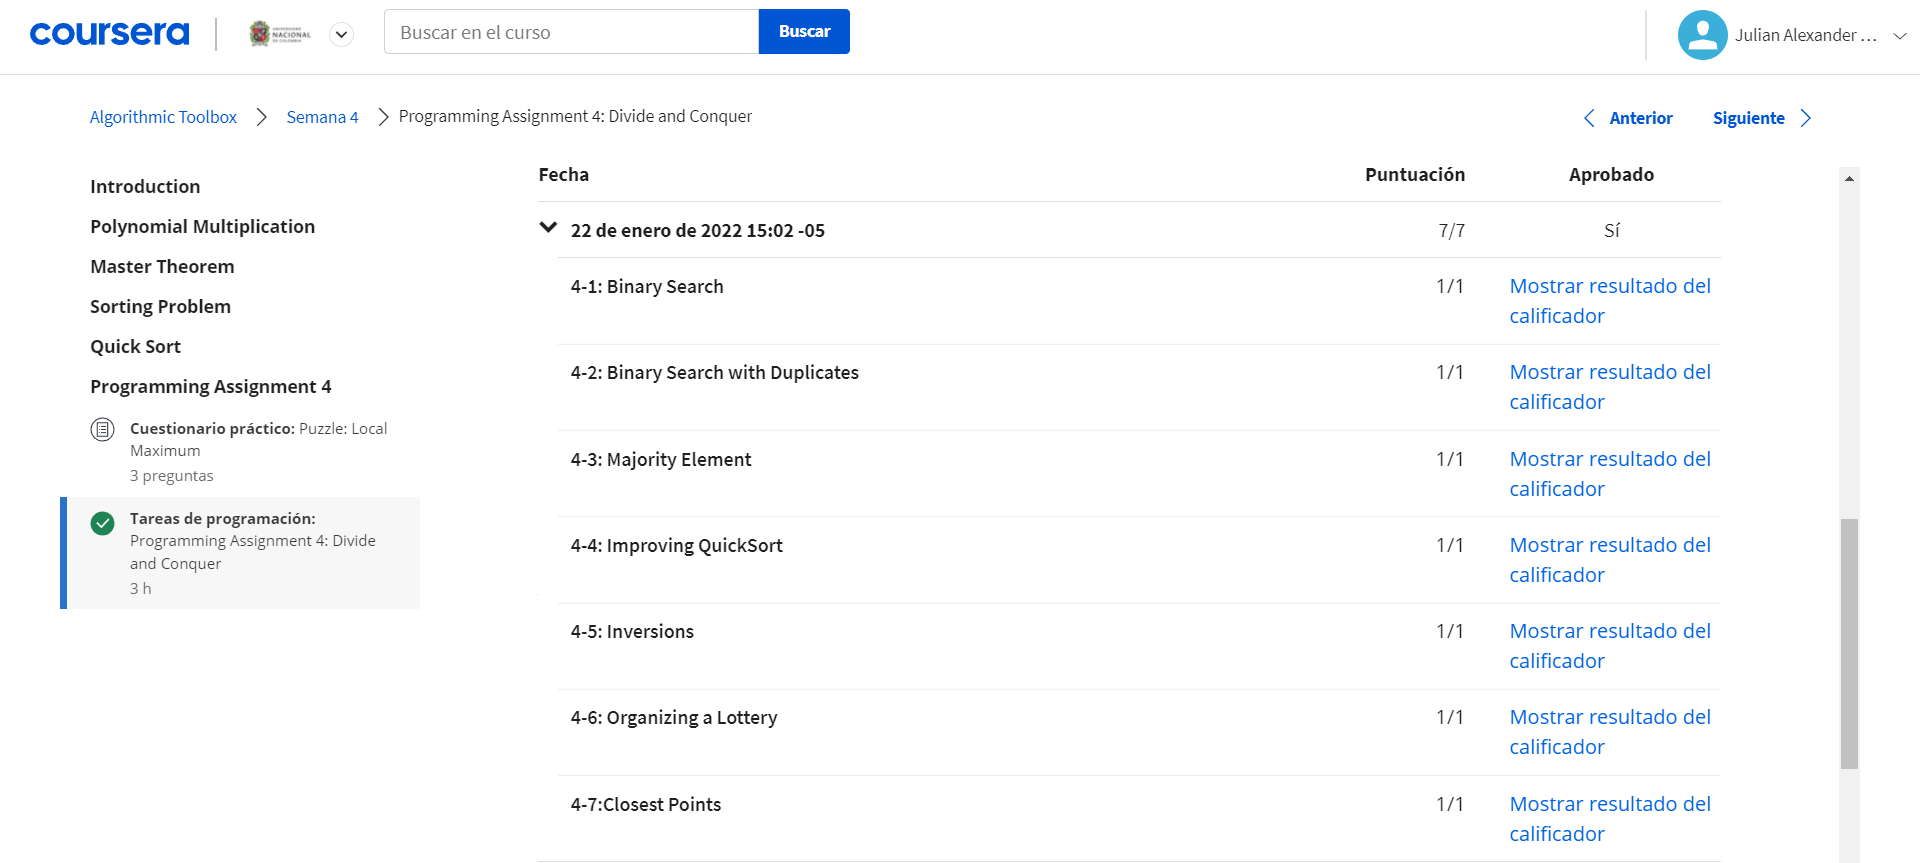

Juan Sebastián Pachón Carvajar

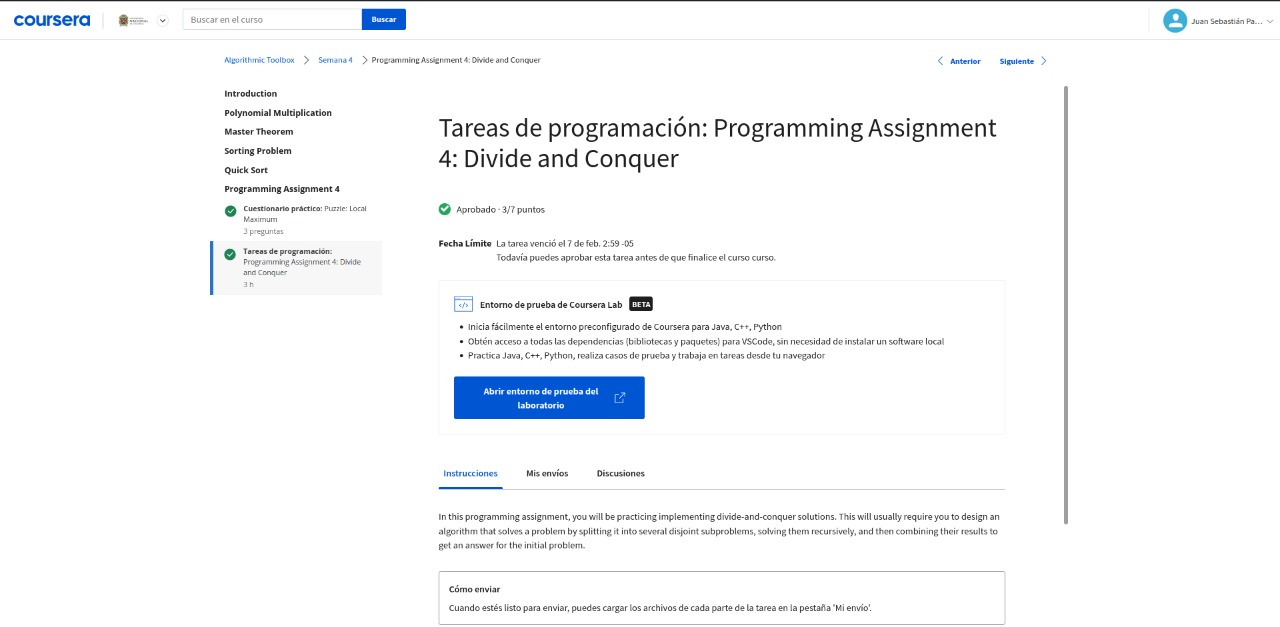

Juan Estiven Balsero Oyuela

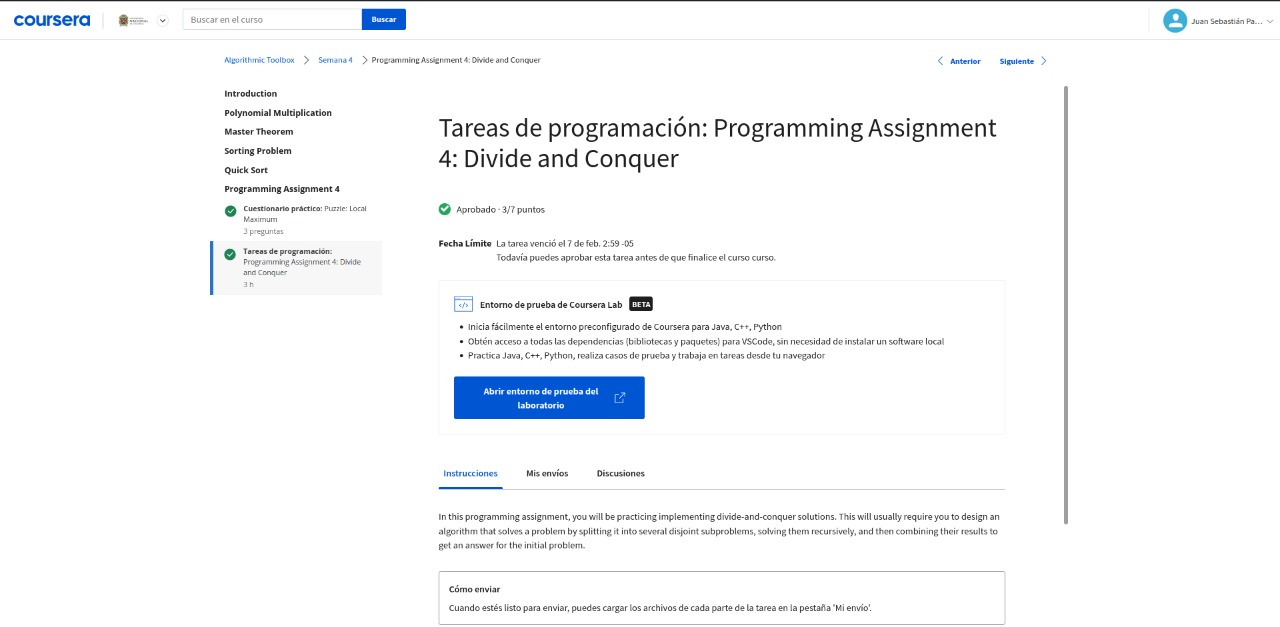